# Titanic Dataset – Exploratory Data Analysis (EDA)

This notebook performs exploratory data analysis on the cleaned Titanic dataset.
The goal is to understand passenger profiles and key factors influencing survival.
All visuals are created using Plotly for interactive and clear presentation.


## 1. Importing Libraries

In [65]:
# Importing essential libraries
import pandas as pd
import plotly.express as px
import plotly.figure_factory as ff  # for interactive heatp



Why: 
We import the necessary libraries for data handling and visualization.
Plotly is used because it provides clean, interactive charts with tooltips.

## 2. Loading the Cleaned Dataset

In [66]:
#Loading Cleaned titanic dataset
df = pd.read_csv('cleaned_titanic.csv')# Load Titanic dataset             
df.head()# Preview first 5 rows


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S


Why:
To load the cleaned Titanic dataset and quickly preview the first few record
sTo view the first few rows and confirm all 12 Titanic columns are loaded correctly.

Observation:
Dataset contains details like Survived, Pclass, Sex, Age, Fare, Cabin, Embarked etc.

## 3. Inspecting Dataset Structure

In [67]:
# Checking the number of rows and columns in the dataset
df.shape

(891, 12)

Why:
To understand the overall size of the dataset in terms of rows and columns.

Observation:
The dataset has 891 rows and 12 columns, which is a moderate size for EDA.

In [68]:
# Structure + data types + missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Why:
To check column data types and confirm there are no unexpected null values after cleaning.

Observation:
Numeric columns (Age, Fare, Pclass, etc.) are correctly stored as numeric types, and
categorical columns (Sex, Embarked, Cabin, etc.) are stored as object types.
Key columns do not contain missing values after cleaning.


In [69]:
# Checking the total number of missing values in each column
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Why:
To verify that missing values were properly handled in the cleaning step.

Observation:
All important analysis columns show zero missing values, confirming that the dataset
is clean and suitable for visualization.


# 4. Univariate Analysis
## 4.1 Age Distribution (Histogram)

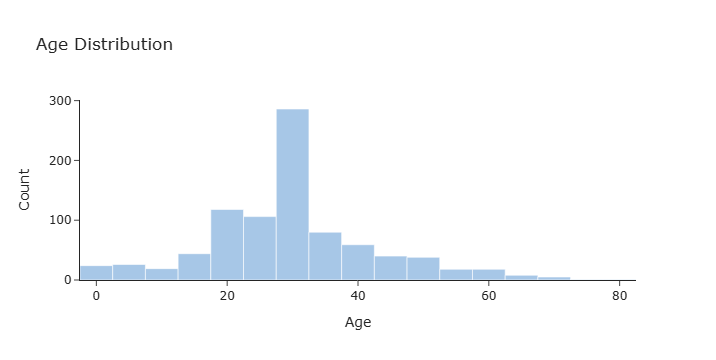

In [70]:
# --- Age Distribution ---
fig = px.histogram(
    df,
    x="Age",
    nbins=35,
    title="Age Distribution",
    color_discrete_sequence=["#A7C7E7"]   # pastel blue
)

fig.update_layout(
    xaxis_title="Age",
    yaxis_title="Count",
    template="simple_white"
)

fig.show()


Why:
To understand the overall age profile of passengers and identify the dominant age groups on the Titanic.

Observation:
Most passengers were between 20–40 years old, showing a high concentration of young adults. Very few children and elderly passengers are present.


## 4.2 Gender Distribution (Bar Chart)

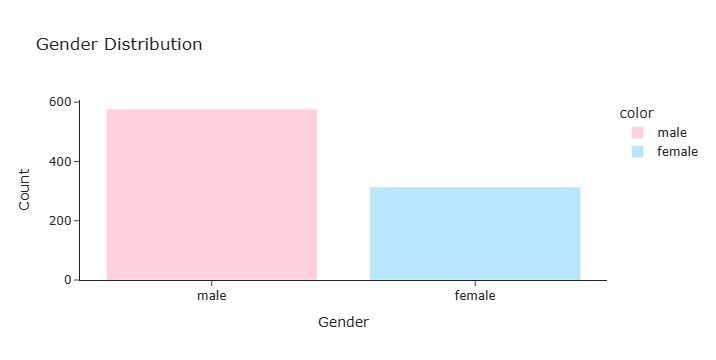

In [71]:
# --- Gender Distribution ---
fig = px.bar(
    df,
    x=df["Sex"].value_counts().index,
    y=df["Sex"].value_counts().values,
    title="Gender Distribution",
    labels={"x": "Gender", "y": "Count"},
    color=df["Sex"].value_counts().index,
    color_discrete_sequence=["#FFD1DC", "#B9E6FF"]   # soft pink & baby blue
)

fig.update_layout(template="simple_white")
fig.show()


Why:
To observe the gender composition onboard and understand the ratio of male to female passengers.

Observation:
The dataset contains significantly more male passengers than female passengers. This imbalance plays a major role in later survival outcomes.


# 5. Bivariate Analysis
## 5.1 Survival by Gender (Bar Chart)

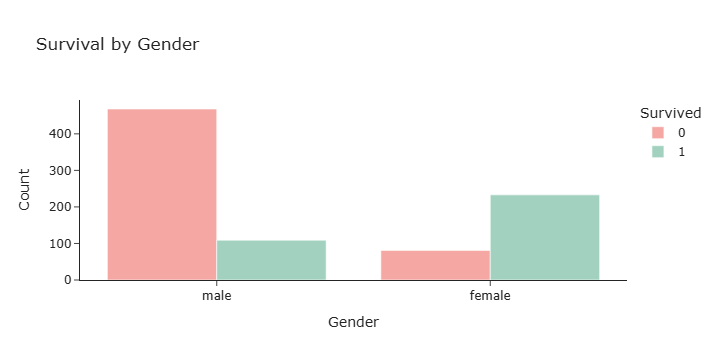

In [81]:
# --- Survival by Gender ---
fig = px.histogram(
    df,
    x="Sex",
    color="Survived",
    barmode="group",
    title="Survival by Gender",
    color_discrete_sequence=["#F4A7A3", "#A2D2BF"]  # pastel red & pastel mint
)

fig.update_layout(
    xaxis_title="Gender",
    yaxis_title="Count",
    template="simple_white",
    legend_title="Survived"
)
fig.show()




Why:
To analyze how gender impacted survival rates on the Titanic.

Observation:
Female passengers show a much higher survival count than males. This supports the “women and children first” evacuation policy, with males forming the majority of the non-surviving group.


## 5.2  Fare vs Survival (Box Plot)

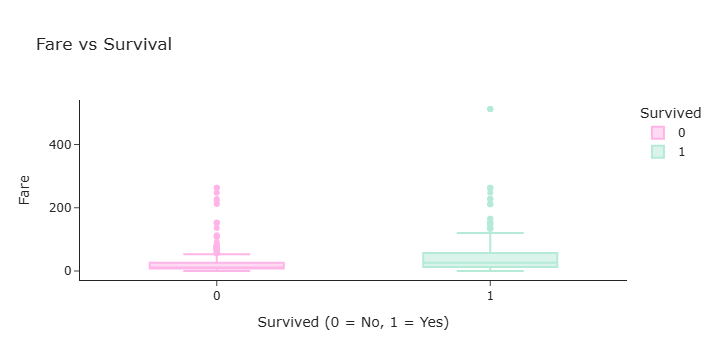

In [73]:
# --- Fare vs Survival ---
fig = px.box(
    df,
    x="Survived",
    y="Fare",
    title="Fare vs Survival",
    color="Survived",
    color_discrete_sequence=["#FFB5E8", "#B5EAD7"]  # pastel pink & pastel green
)

fig.update_layout(
    xaxis_title="Survived (0 = No, 1 = Yes)",
    yaxis_title="Fare",
    template="simple_white",
)
fig.show()


Why:
To understand whether ticket price (and therefore passenger class) influenced survival chances.

Observation:
Survivors generally paid higher fares, suggesting that 1st class passengers had better access to lifeboats and a higher chance of survival compared to lower-class passengers.

# 6 Multivariate Analysis
## 6.1 Correlation Heatmap 

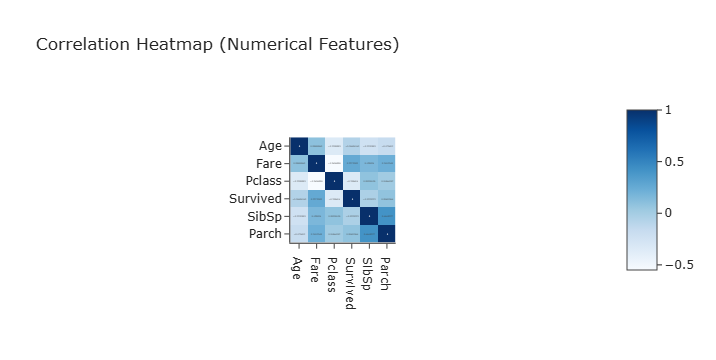

In [74]:
# --- Correlation Heatmap ---
corr = df[["Age", "Fare", "Pclass", "Survived", "SibSp", "Parch"]].corr()

fig = px.imshow(
    corr,
    text_auto=True,
    color_continuous_scale="Blues",
    title="Correlation Heatmap (Numerical Features)"
)

fig.update_layout(template="simple_white")
fig.show()



Why:
To examine numerical relationships and identify which features are most associated with survival.

Observation:
Survival is positively correlated with Fare and negatively correlated with Pclass, confirming that wealth and passenger class strongly influenced survival. Age shows very weak correlation.


## 6.2 Age vs Fare Colored by Survival (Scatter PLot)

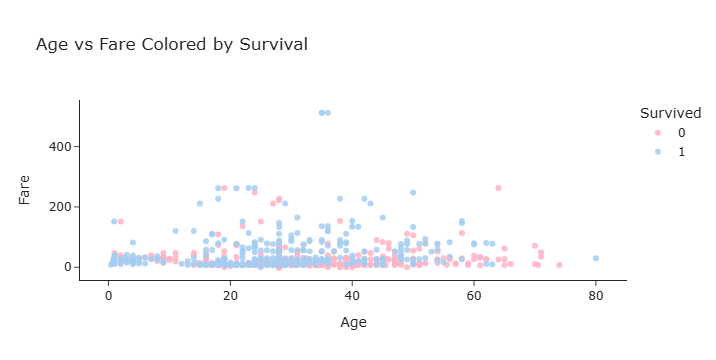

In [88]:
# Convert Survived to categorical (string)
df["Survived_str"] = df["Survived"].astype(str)

fig = px.scatter(
    df,
    x="Age",
    y="Fare",
    color="Survived_str",     # Use string column → pastel colors work!
    title="Age vs Fare Colored by Survival",
    opacity=0.85,
    color_discrete_map={
        "0": "#FFB3C6",   # pastel coral (non-survivors)
        "1": "#A3CEF1"    # pastel baby blue (survivors)
    }
)

fig.update_layout(
    xaxis_title="Age",
    yaxis_title="Fare",
    legend_title="Survived",
    template="simple_white"
)

fig.show()




Why:
To analyze how fare and age together relate to survival, combining three features in a single plot.

Observation:
Higher-fare passengers show a higher survival rate across all ages. Age alone does not determine survival, but fare (class) clearly plays a major role.